## Data Wrangling / Data Cleaning / Data Pre Processing

In [25]:
#Importing the various Modules required

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder

In [27]:
#Retrieve the Data from URL or from Local Repository

In [28]:
empData = pd.read_csv("C:/Users/kiran/Documents/Project/Data/INX Raw Data.csv")
#empData = pd.read_excel("http://data.iabac.org/exam/p2/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
empData.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [29]:
empData.shape

(1200, 28)

In [30]:
empData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [44]:
empData.describe()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,0.604167,2.23500,1.096667,3.215000,9.039167,1.595000,9.165833,2.89250,2.715833,...,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,0.148333,2.948333
std,9.087289,0.489233,1.31004,0.731050,1.696911,4.754451,0.679234,8.176636,1.04412,1.090599,...,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.355578,0.518866
min,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,0.000000,1.00000,1.000000,1.000000,4.000000,1.000000,2.000000,2.00000,2.000000,...,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,3.000000
50%,36.000000,1.000000,2.00000,1.000000,4.000000,9.000000,2.000000,7.000000,3.00000,3.000000,...,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,3.000000
75%,43.000000,1.000000,3.00000,2.000000,5.000000,13.000000,2.000000,14.000000,4.00000,4.000000,...,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.000000,3.000000
max,60.000000,1.000000,5.00000,2.000000,5.000000,18.000000,2.000000,29.000000,5.00000,4.000000,...,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,4.000000


In [31]:
empData['EmpNumber'].duplicated().sum()

0

In [45]:
empData.isnull().values.any()  # check data has any values null/nan or not

False

In [47]:
columnNames = empData.columns.tolist()
print(columnNames)

['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition', 'PerformanceRating']


In [32]:
#Encode each of the Columns with Data Type as Object using LabelEncoder

In [33]:
encode = LabelEncoder()

In [34]:
empData['Gender'] = encode.fit_transform(empData['Gender'])
empData['EducationBackground'] = encode.fit_transform(empData['EducationBackground'])
empData['MaritalStatus'] = encode.fit_transform(empData['MaritalStatus'])
empData['EmpDepartment'] = encode.fit_transform(empData['EmpDepartment'])
empData['EmpJobRole'] = encode.fit_transform(empData['EmpJobRole'])
empData['BusinessTravelFrequency'] = encode.fit_transform(empData['BusinessTravelFrequency'])
empData['OverTime'] = encode.fit_transform(empData['OverTime'])
empData['Attrition'] = encode.fit_transform(empData['Attrition'])

In [35]:
empData.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


In [36]:
print("Low:          :",((empData.PerformanceRating[empData.PerformanceRating == 1].count())/empData.PerformanceRating.count())*100)
print("Good:         :",((empData.PerformanceRating[empData.PerformanceRating == 2].count())/empData.PerformanceRating.count())*100)
print("Excellent:     :",((empData.PerformanceRating[empData.PerformanceRating == 3].count())/empData.PerformanceRating.count())*100)
print("Out Standing: :",((empData.PerformanceRating[empData.PerformanceRating == 4].count())/empData.PerformanceRating.count())*100)

Low:          : 0.0
Good:         : 16.166666666666664
Excellent:     : 72.83333333333334
Out Standing: : 11.0


In [37]:
empData1=empData.copy()
add=list(empData.iloc[:,:-1].min().values)
#add.append(1)
d=add.copy()
a=empData.columns
for j in range(30):
    new=[]
    a1={}
    for i in add:
        if type(i)==str:
            new.append(i)
        elif (i > 0):
            i=i-1
            new.append(i)
        else:
            new.append(0)      
    add=new
    new1=new.copy()
    new2=[]
    for k in new1:
        new2.append([k])
    new2.append([1])
    #print(new2)
    for k1 in range(len(a)):
        a1[a[k1]]=new2[k1]
    
    a2=pd.DataFrame(a1)
    empData1=empData1.append(a2)
empData1.tail(30)
#print(a)
#a2

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,E1001000,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,E1001000,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,E1001000,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,E1001000,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,E1001000,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,E1001000,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,E1001000,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,E1001000,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,E1001000,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
print("Low:          :",((empData1.PerformanceRating[empData1.PerformanceRating == 1].count())/empData1.PerformanceRating.count())*100)
print("Good:         :",((empData1.PerformanceRating[empData1.PerformanceRating == 2].count())/empData1.PerformanceRating.count())*100)
print("Excellent:     :",((empData1.PerformanceRating[empData1.PerformanceRating == 3].count())/empData1.PerformanceRating.count())*100)
print("Out Standing: :",((empData1.PerformanceRating[empData1.PerformanceRating == 4].count())/empData1.PerformanceRating.count())*100)

Low:          : 2.4390243902439024
Good:         : 15.772357723577235
Excellent:     : 71.0569105691057
Out Standing: : 10.731707317073171


In [39]:
empData1.corr().sum().sort_values()

Attrition                       0.545832
OverTime                        2.078044
Gender                          2.095573
DistanceFromHome                2.473865
MaritalStatus                   2.495701
NumCompaniesWorked              2.553606
EducationBackground             2.817645
TrainingTimesLastYear           3.303162
BusinessTravelFrequency         3.478048
EmpJobSatisfaction              3.521668
EmpJobRole                      3.584341
EmpHourlyRate                   3.713984
EmpRelationshipSatisfaction     3.784260
EmpDepartment                   3.805885
EmpEnvironmentSatisfaction      3.947507
YearsSinceLastPromotion         4.222493
PerformanceRating               4.525711
EmpJobInvolvement               4.578351
EmpEducationLevel               4.705266
EmpLastSalaryHikePercent        4.782338
YearsWithCurrManager            4.850050
EmpWorkLifeBalance              5.038937
ExperienceYearsInCurrentRole    5.069475
ExperienceYearsAtThisCompany    5.468868
EmpJobLevel     

In [40]:
#import Seaborn
import seaborn as sns

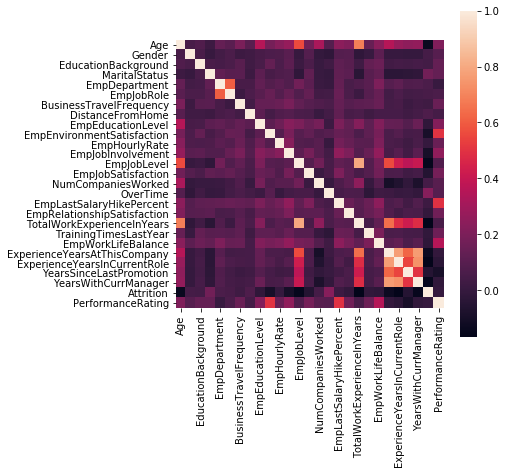

In [43]:
#sns.heatmap(empData1.corr())
variableCorrelation = empData1.corr()
variableCorrelation

f, ax = plt.subplots(figsize=(6, 6))
# Draw the heatmap using seaborn
sns.heatmap(variableCorrelation, square=True)
plt.show()

In [24]:
empData1=empData1.drop('EmpNumber',axis=1)
empData1.head()
pd.DataFrame.to_csv(empData1,'C:\\Users\\kiran\\Documents\\Project\\Data\\INX Clean Data.csv')

# --------- Please look into the Main Code ---------->